In [2]:
import nltk
import spacy
import os
import numpy as np
from nltk.tokenize import RegexpTokenizer
import matplotlib.pylab as plt
from tqdm import tqdm
from nltk.stem.snowball import PorterStemmer,SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# part 1 code  for Comparing the values 


In [4]:
tokenizer = RegexpTokenizer("[a-zA-Z@]+")

In [7]:
fd = os.listdir(r"C:\Users\babbe\Downloads\corpora") 

In [8]:
splits = []
unique = set([])
for i in range(44):
    split = fd[i*144:(i+1)*144]
    select = np.random.choice(split, 24, replace=False)
    
    for x in select:
        unique.add(x)
        
    splits.append(select)
    
print(len(unique))

1056


44*24 = 1056 files are selected and from these we will be further selecting 1000 files

In [9]:
len(splits)

44

In [10]:
len(splits[0])

24

In [11]:
# final docs index to word(token) mapping

class invertedIndex(object):
    def __init__(self,docs):
        self.docs = docs
        self.termList = {}
        self.freqTable = {}
        for key,value in finalDocs.items():
            for term in value:
                if term in self.termList.keys():
                    self.termList[term].add(key)
                else:
                    self.termList[term] = {key}
        for term,ls in self.termList.items():
            self.freqTable[term] = len(ls)
    def search(self,term):
        try:
            return self.termList[term]
        except:
            return "No results"

In [13]:
finalDocs = {} 
corpora = [] 
i = 0
unique = set([])
indexToDoc = {}
docToIndex = {}
for chunks in splits:
    for doc in chunks:
        i+=1 
        unique.add(doc)
        f=open(r"C:\Users\babbe\Downloads\corpora\\"+doc, encoding = "utf8")
        text = f.read()
        corpora.append(text) 
        text = tokenizer.tokenize(text.lower())
        finalDocs[i] = text
        indexToDoc[i] = doc
        docToIndex[doc] = i
        f.close()
        
len(unique)
# finalDocs[0] 
# type(finalDocs[0][0])

1056

In [14]:
for j in range(1,10):
    print(j)
    print(indexToDoc[j],end=' ')
    print(finalDocs[j][:10])

1
GX000-56-16493385 ['skip', 'links', 'u', 's', 'department', 'of', 'state', 'home', 'contact', 'us']
2
GX001-49-1097872 ['logofpd', 'gif', 'button', 'gif', 'pearls', 'about', 'ten', 'years', 'ago', 'a']
3
GX002-01-16503738 ['spam', 'information', 'coalition', 'against', 'unsolicited', 'commercial', 'email', 'cauce', 'monty', 'python']
4
GX001-23-13679550 ['invasive', 'species', 'logo', 'control', 'of', 'invasive', 'species', 'management', 'plans', 'by']
5
GX000-98-16312886 ['who', 'we', 'are', 'whoweare', 'gif', 'apply', 'gif', 'iowa', 'writer', 's']
6
GX001-35-0432171 ['coastal', 'mdstrip', 'gif', 'a', 'building', 'stone', 'is', 'defined', 'as', 'any']
7
GX000-16-4063715 ['federal', 'citizen', 'information', 'center', 's', 'main', 'page', 'site', 'search', 'go']
8
GX000-90-7867636 ['usgs', 'water', 'basics', 'glossary', 'title', 'a', 'b', 'c', 'd', 'e']
9
GX001-08-7866949 ['hhs', 'logo', 'bird', 'faces', 'u', 's', 'department', 'of', 'health', 'and']


In [15]:
ii = invertedIndex(finalDocs)
# ii.termList

In [20]:
ii.freqTable = sorted(ii.freqTable.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse = True) 

In [21]:
print("The size of the vocabulary:")
len(ii.freqTable)

The size of the vocabulary:


86403

In [22]:
q = open(r"C:\Users\babbe\Downloads\query.txt", "r")
text = q.read().split("\n")
q.close()
op = open(r"C:\Users\babbe\Downloads\output.txt", "r")
j = op.readlines()
from collections import defaultdict
k_dict = defaultdict(list)
for i in j:
    k_dict[int(i[:3])].append(i)
op.close()

In [23]:
queries = []
for i in range(22):
    query = text[i*3:(i+1)*3]
    select = np.random.choice(query, 2, replace=False)
    queries.append(select)

In [24]:
queries = np.random.choice(text, 10, replace=False)

In [25]:
queries[:5]

array(['834  global positioning system gps research monitoring earthquakes',
       '850  frequently mississippi river flood banks',
       '750  senator john edwards positions womens issues pay equity abortion title ix violence women',
       '714  restrictions placed older persons renewing drivers licenses',
       '709  limits regulations concerning jockey weight horse racing'],
      dtype='<U141')

In [26]:
def or_query(termList, query):
    ored = []
    for st in query.split():
        if st in termList.keys():
            jj = termList[st]
            ored.extend(jj)
        else:
            pass
    return set(ored)

In [27]:
mj = or_query(ii.termList, query[0][3:])
# list(mj)

In [28]:
def kthPrecisionRecall(k, termList, t_m, k_dict,finalDocs):
    
    average_pres = 0.0
    average_recall = 0.0
    for query in t_m:
        #print(query)
        mj = or_query(termList, query[3:])
        #print(mj)
        try:
            outp_num = int(query[:3])
        except:
            continue
        outp_file_list = k_dict[outp_num]
        #print(outp_file_list)
        predicted_file_list = []
        #print(mj)
        try:
            #print(finalDocs["715 GX001-28-5148808 \n"])
            for i in mj:
                temp = indexToDoc[i]
                #print(temp)
                predicted_file_list.append(temp)
            #predicted_file_list.append(indexToDoc[i] for i in mj)
        except ValueError:
            print("OUT")
        #print(predicted_file_list)
        #predicted_file_list = set(predicted_file_list)
        actual_file_list = [i[4:].rstrip() for i in outp_file_list]
        top_k = actual_file_list[:k]
        rel_num = len(list(set(predicted_file_list).intersection(top_k)))
        tr_num = len(list(set(predicted_file_list).intersection(actual_file_list)))
        if len(top_k) == 0:
            continue
        recall = (rel_num*1.0)/(len(top_k))
        precision = (rel_num*1.0)/(len(predicted_file_list))
        print("RECALL")
        print(recall)
        print("PRECISION")
        print(precision)
        
        average_pres += precision
        average_recall += recall
        #break
        
        
    average_pres /= 10
    average_recall /= 10
    print("AVERAGE RECALL")
    print(average_recall)
    print("AVERAGE PRECISION")
    print(average_pres)

In [29]:
kthPrecisionRecall(5, ii.termList, queries, k_dict,finalDocs)

RECALL
0.2
PRECISION
0.0013531799729364006
RECALL
0.0
PRECISION
0.0
RECALL
0.0
PRECISION
0.0
RECALL
0.0
PRECISION
0.0
RECALL
0.0
PRECISION
0.0
RECALL
0.2
PRECISION
0.0012376237623762376
RECALL
0.4
PRECISION
0.00392156862745098
RECALL
0.2
PRECISION
0.0016313213703099511
RECALL
0.0
PRECISION
0.0
RECALL
0.2
PRECISION
0.0017006802721088435
AVERAGE RECALL
0.12
AVERAGE PRECISION
0.0009844374005182413


In [30]:
kthPrecisionRecall(10, ii.termList, queries, k_dict,finalDocs)

RECALL
0.1
PRECISION
0.0013531799729364006
RECALL
0.0
PRECISION
0.0
RECALL
0.1
PRECISION
0.0013386880856760374
RECALL
0.1
PRECISION
0.0018832391713747645
RECALL
0.1
PRECISION
0.0019083969465648854
RECALL
0.2
PRECISION
0.0024752475247524753
RECALL
0.3
PRECISION
0.0058823529411764705
RECALL
0.1
PRECISION
0.0016313213703099511
RECALL
0.1
PRECISION
0.0016806722689075631
RECALL
0.1
PRECISION
0.0017006802721088435
AVERAGE RECALL
0.12000000000000004
AVERAGE PRECISION
0.0019853778553807393


In [31]:
kthPrecisionRecall(15, ii.termList, queries, k_dict,finalDocs)

RECALL
0.06666666666666667
PRECISION
0.0013531799729364006
RECALL
0.06666666666666667
PRECISION
0.0023584905660377358
RECALL
0.13333333333333333
PRECISION
0.002677376171352075
RECALL
0.06666666666666667
PRECISION
0.0018832391713747645
RECALL
0.06666666666666667
PRECISION
0.0019083969465648854
RECALL
0.26666666666666666
PRECISION
0.0049504950495049506
RECALL
0.26666666666666666
PRECISION
0.00784313725490196
RECALL
0.06666666666666667
PRECISION
0.0016313213703099511
RECALL
0.13333333333333333
PRECISION
0.0033613445378151263
RECALL
0.13333333333333333
PRECISION
0.003401360544217687
AVERAGE RECALL
0.12666666666666665
AVERAGE PRECISION
0.0031368341585015537


   # Above are the values of precision and recall from previous code

In [32]:
queries

array(['834  global positioning system gps research monitoring earthquakes',
       '850  frequently mississippi river flood banks',
       '750  senator john edwards positions womens issues pay equity abortion title ix violence women',
       '714  restrictions placed older persons renewing drivers licenses',
       '709  limits regulations concerning jockey weight horse racing',
       '713  state maryland clean chesapeake bay',
       '740  regulates assisted living facilities maryland',
       '753  programs schools prevent bullying students',
       '730  possible complications potential dangers gastric bypass surgery',
       '743  regulations considerations concerning registering freighter country'],
      dtype='<U141')

In [33]:
for i in queries:
    corpora.append(i[3:])

In [34]:

from nltk.tokenize import RegexpTokenizer
finalDocs[1]
print(len(indexToDoc))
tokenizer = RegexpTokenizer("[a-zA-Z@]+")

1056


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize , word_tokenize 

In [36]:
def myTokenizer(sentence):
    words = tokenizer.tokenize(sentence.lower())
    return words
myTokenizer(corpora[0])

['skip',
 'links',
 'u',
 's',
 'department',
 'of',
 'state',
 'home',
 'contact',
 'us',
 'email',
 'this',
 'page',
 'foia',
 'privacy',
 'notice',
 'archive',
 'search',
 'go',
 'u',
 's',
 'department',
 'of',
 'state',
 'i',
 'spcr',
 'gif',
 'about',
 'the',
 'state',
 'dept',
 'press',
 'and',
 'public',
 'affairs',
 'travel',
 'and',
 'living',
 'abroad',
 'countries',
 'and',
 'regions',
 'international',
 'issues',
 'history',
 'education',
 'and',
 'culture',
 'business',
 'center',
 'other',
 'services',
 'employment',
 'print',
 'friendly',
 'version',
 'bureau',
 'of',
 'european',
 'and',
 'eurasian',
 'affairs',
 'november',
 'people',
 'history',
 'government',
 'political',
 'conditions',
 'economy',
 'foreign',
 'relations',
 'u',
 's',
 'relations',
 'travel',
 'business',
 'background',
 'notes',
 'a',
 'z',
 'background',
 'note',
 'ireland',
 'profile',
 'official',
 'name',
 'republic',
 'of',
 'ireland',
 'government',
 'area',
 'sq',
 'km',
 'sq',
 'mi',
 'sl

In [37]:
corpora[0]

'Skip Links U.S. Department of State\nHome Contact Us Email this Page FOIA Privacy Notice Archive\nSearch __________ Go\nU.S. Department of State [i_spcr08.gif] About the State Dept.\nPress and Public Affairs Travel and Living Abroad Countries and Regions International Issues History, Education and Culture Business Center Other Services Employment\n[Print Friendly Version]\nBureau of European and Eurasian Affairs November 2003\nPeople History Government Political Conditions Economy Foreign Relations U.S. Relations Travel/Business Background Notes A-Z Background Note: Ireland\nPROFILE\nOFFICIAL NAME: Republic of Ireland\nGovernment Area: 70,282 sq. km. (27,136 sq. mi.); slightly larger than West Virginia.\nCities: Capital--County Dublin (pop.\n1,122,821) of which City of Dublin (pop.495,101).\nOther cities--Cork (123,338), Galway (65,774), Limerick (54,058), Waterford, (44,564).\nTerrain: Arable 10%, meadows and pastures 77%, rough grazing in use 11%, inland water 2%.\nClimate: Temperat


# Raw Term Frequency Method

In [38]:
cv = CountVectorizer(tokenizer=myTokenizer)
vectorized_corpus = cv.fit_transform(corpora)
vc = vectorized_corpus.toarray()

In [39]:
len(cv.vocabulary_)

86403

In [42]:
import sklearn
cos_sim = sklearn.metrics.pairwise.cosine_similarity(vc[-10:], Y=vc[:-10], dense_output=True)

In [43]:
file_set = set([])
for (index, file_name) in indexToDoc.items():
    file_set.add(file_name)

In [45]:
f = open(r"C:\Users\babbe\Downloads\output.txt", "r")
queryToOutput = {}
text = f.read().split("\n")

for line in text:
    if len(line.split()) < 2:
        continue
    queryIndex = line.split()[0]
    fileName = line.split()[1]
    if queryIndex in queryToOutput.keys():
        queryToOutput[queryIndex].add(fileName)
    else:
        queryToOutput[queryIndex] = set([fileName])
        
query_numbers = []
query_sets = []
query_index = []
for i in queries:
    query_numbers.append(i.split()[0])
    query_sets.append(queryToOutput[i.split()[0]] & file_set)
    query_index.append(set([]))
    for x in query_sets[-1]:
        query_index[-1].add(docToIndex[x])
    print(i.split()[0], query_sets[-1])
    print(i.split()[0], query_index[-1])

f.close()

834 {'GX045-41-2168949', 'GX004-25-13019835', 'GX021-78-14111704', 'GX010-35-15955392', 'GX040-81-16166035', 'GX243-29-13067685'}
834 {762, 103, 204, 369, 52, 314}
850 {'GX269-26-14945333', 'GX184-99-15143494', 'GX042-96-1892904', 'GX257-21-0731466'}
850 {600, 1010, 910, 351}
750 {'GX027-18-10108767', 'GX008-89-13408841', 'GX271-80-2290494', 'GX026-16-11928943', 'GX032-08-7220157', 'GX234-42-9347863', 'GX017-50-16727292', 'GX008-29-15595938', 'GX240-51-15929960', 'GX233-86-13327098', 'GX044-14-8159649', 'GX266-12-2124404'}
750 {350, 259, 73, 1037, 77, 303, 721, 658, 180, 985, 670, 255}
714 {'GX229-13-4367716', 'GX231-46-2838862', 'GX230-88-16182282', 'GX249-94-9625890', 'GX238-98-6238053'}
714 {609, 642, 742, 647, 810}
709 {'GX235-23-0231479', 'GX271-74-0546425', 'GX271-37-14516566', 'GX233-58-3122862'}
709 {1056, 649, 1050, 695}
713 {'GX023-29-8603905', 'GX272-04-8612731', 'GX256-83-11559847', 'GX268-44-16055966', 'GX238-39-8334591', 'GX228-20-4909978', 'GX240-87-3277355', 'GX241-85-7

#### Result calculation after Raw Term Frequency Method

In [46]:
def calc(count):
    import heapq
    matchList = [None]*10
    result = [None]*10
    print("Results - (Precision, Recall) for Level ", count, ": ")
    for i in range(10):
        matchList[i] = set([x+1 for x in heapq.nlargest(count, range(len(cos_sim[i])), cos_sim[i].__getitem__)])
        #print(matchList[i])
        matchCount = len(matchList[i] & query_index[i])
        result[i] = (matchCount/count, matchCount/len(query_index[i]))
        print("Query ", i+1, ": ", result[i])

*** 5th level precision and recall ***

In [47]:
calc(5)

Results - (Precision, Recall) for Level  5 : 
Query  1 :  (0.8, 0.6666666666666666)
Query  2 :  (0.8, 1.0)
Query  3 :  (1.0, 0.4166666666666667)
Query  4 :  (0.4, 0.4)
Query  5 :  (0.6, 0.75)
Query  6 :  (1.0, 0.5555555555555556)
Query  7 :  (1.0, 0.3125)
Query  8 :  (0.4, 0.6666666666666666)
Query  9 :  (0.8, 0.6666666666666666)
Query  10 :  (0.0, 0.0)


*** 10th level precision and recall ***

In [48]:
calc(10)

Results - (Precision, Recall) for Level  10 : 
Query  1 :  (0.5, 0.8333333333333334)
Query  2 :  (0.4, 1.0)
Query  3 :  (0.8, 0.6666666666666666)
Query  4 :  (0.2, 0.4)
Query  5 :  (0.4, 1.0)
Query  6 :  (0.8, 0.8888888888888888)
Query  7 :  (0.9, 0.5625)
Query  8 :  (0.3, 1.0)
Query  9 :  (0.6, 1.0)
Query  10 :  (0.1, 0.14285714285714285)


*** 15th level precision and recall ***

In [49]:
calc(15)

Results - (Precision, Recall) for Level  15 : 
Query  1 :  (0.4, 1.0)
Query  2 :  (0.26666666666666666, 1.0)
Query  3 :  (0.6666666666666666, 0.8333333333333334)
Query  4 :  (0.26666666666666666, 0.8)
Query  5 :  (0.26666666666666666, 1.0)
Query  6 :  (0.6, 1.0)
Query  7 :  (0.8666666666666667, 0.8125)
Query  8 :  (0.2, 1.0)
Query  9 :  (0.4, 1.0)
Query  10 :  (0.06666666666666667, 0.14285714285714285)


# **Comparison of result with previous precision and recall   <br>
# Please click on the block to get the view<br> 
Comparing 10th level values<br>

Results - new(Precision, Recall)                               old(Precision , Recall) 
Query  1 :  (0.5, 0.8333333333333334)                             (0.0013 , 0.1)<br>
Query  2 :  (0.4, 1.0)                                            (0 , 0)<br>
Query  3 :  (0.8, 0.6666666666666666)                             (0.00134 , 0.1)<br>
Query  4 :  (0.2, 0.4)                                            (0.00188, 0.1)<br>
Query  5 :  (0.4, 1.0)                                             (0.00191, 0.1)<br>
Query  6 :  (0.8, 0.8888888888888888)                              (0.00247, 0.2)<br>
Query  7 :  (0.9, 0.5625)                                          (0.00588, 0.3)<br>
Query  8 :  (0.3, 1.0)                                             (0.00163, 0.1)<br>
Query  9 :  (0.6, 1.0)                                             (0.00168, 0.1)<br>
Query  10 :  (0.1, 0.14285714285714285)                            (0.0017 , 0.1)<br>

By using Raw term frequency we have a significant improvement over precision and recall as showed by results. <br>


# TF-IDF Method

In [50]:
type(vc)

numpy.ndarray

Using library function of  TfidfVectorizer for better implementation.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=myTokenizer)
vc = tfidf_vectorizer.fit_transform(corpora).toarray()
print(vc)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
############# IF WE WANT TO MAKE OUR OWN VECTORIZER Functions are as follows #############

# def computeTF(word_Dict, bow):
#     tfDict = {}
#     bowCount = len(bow)
#     for word, count in word_Dict.items():
#         tfDict[word] = count / float(bowCount)
#     return tfDict
# def computeIDF(docList):
#     import math
#     idfDict = {}
#     N = len(docList)
#     #Counts the number of documents that contain a word w
#     idfDict = dict.fromkeys(docList[0].keys(),0)
#     for doc in docList:
#         for word, val in doc.items():
#             if val > 0:
#                 idfDict[word] += 1
#     #Divide N by denominator above, take the log of that
#     for word, val in idfDict.items():
#         idfDict[word]= math.log(N / float(val),2)
#     return idfDict
# def computeTFIDF(tfBow, idfs):
#     tfidf = {}
#     for word, val in tfBow.items():
#         if word in idfs:
#             tfidf[word] = val * idfs[word]
#         else:
#             tfidf[word] = 0
#     return tfidf
# tf = {}
# for ii in word_dict:
#     tf[ii] = computeTF(word_dict[ii], bag_of_words[ii])
# #list of word_dict of all documents
# list_of_word_dict = []
# for i in word_dict:
#     list_of_word_dict.append(word_dict[i])
# #compute idf for all terms
# idfs = computeIDF(list_of_word_dict)
# #list of word_dict of all documents
# list_of_word_dict = []
# for i in word_dict:
#     list_of_word_dict.append(word_dict[i])
# #compute idf for all terms
# idfs = computeIDF(list_of_word_dict)
# tf_idfs = {}
# for i in tf:
#     tf_idfs[i] = computeTFIDF(tf[i], idfs)
# list_of_tf_idfs = []
# for i in tf_idfs:
#     list_of_tf_idfs.append(tf_idfs[i])

In [52]:
#print(vc[0])
v = vc[0]
print(indexToDoc[1])
#print(v)
#print(cv.inverse_transform(v)[0][0])
i = cv.vocabulary_['a']
print(v[i])

GX000-56-16493385
0.11768152994268286


In [53]:
import sklearn
cos_sim = sklearn.metrics.pairwise.cosine_similarity(vc[-10:], Y=vc[:-10], dense_output=True)

In [54]:
file_set = set([])
for (index, file_name) in indexToDoc.items():
    file_set.add(file_name)

In [55]:
f = open(r"C:\Users\babbe\Downloads\output.txt", "r")

queryToOutput = {}
text = f.read().split("\n")

for line in text:
    if len(line.split()) < 2:
        continue
    queryIndex = line.split()[0]
    fileName = line.split()[1]
    if queryIndex in queryToOutput.keys():
        queryToOutput[queryIndex].add(fileName)
    else:
        queryToOutput[queryIndex] = set([fileName])
        
query_numbers = []
query_sets = []
query_index = []
for i in queries:
    query_numbers.append(i.split()[0])
    query_sets.append(queryToOutput[i.split()[0]] & file_set)
    query_index.append(set([]))
    for x in query_sets[-1]:
        query_index[-1].add(docToIndex[x])
    print(i.split()[0], query_sets[-1])
    print(i.split()[0], query_index[-1])

f.close()

834 {'GX045-41-2168949', 'GX004-25-13019835', 'GX021-78-14111704', 'GX010-35-15955392', 'GX040-81-16166035', 'GX243-29-13067685'}
834 {762, 103, 204, 369, 52, 314}
850 {'GX269-26-14945333', 'GX184-99-15143494', 'GX042-96-1892904', 'GX257-21-0731466'}
850 {600, 1010, 910, 351}
750 {'GX027-18-10108767', 'GX008-89-13408841', 'GX271-80-2290494', 'GX026-16-11928943', 'GX032-08-7220157', 'GX234-42-9347863', 'GX017-50-16727292', 'GX008-29-15595938', 'GX240-51-15929960', 'GX233-86-13327098', 'GX044-14-8159649', 'GX266-12-2124404'}
750 {350, 259, 73, 1037, 77, 303, 721, 658, 180, 985, 670, 255}
714 {'GX229-13-4367716', 'GX231-46-2838862', 'GX230-88-16182282', 'GX249-94-9625890', 'GX238-98-6238053'}
714 {609, 642, 742, 647, 810}
709 {'GX235-23-0231479', 'GX271-74-0546425', 'GX271-37-14516566', 'GX233-58-3122862'}
709 {1056, 649, 1050, 695}
713 {'GX023-29-8603905', 'GX272-04-8612731', 'GX256-83-11559847', 'GX268-44-16055966', 'GX238-39-8334591', 'GX228-20-4909978', 'GX240-87-3277355', 'GX241-85-7

#### Result calculation after TFIDF Method

In [56]:
def calc(count):
    import heapq
    matchList = [None]*10
    result = [None]*10
    print("Results - (Precision, Recall) for Level ", count, ": ")
    for i in range(10):
        matchList[i] = set([x+1 for x in heapq.nlargest(count, range(len(cos_sim[i])), cos_sim[i].__getitem__)])
        #print(matchList[i])
        matchCount = len(matchList[i] & query_index[i])
        result[i] = (matchCount/count, matchCount/len(query_index[i]))
        print("Query ", i+1, ": ", result[i])

In [57]:
calc(5)

Results - (Precision, Recall) for Level  5 : 
Query  1 :  (0.8, 0.6666666666666666)
Query  2 :  (0.8, 1.0)
Query  3 :  (1.0, 0.4166666666666667)
Query  4 :  (0.4, 0.4)
Query  5 :  (0.8, 1.0)
Query  6 :  (1.0, 0.5555555555555556)
Query  7 :  (1.0, 0.3125)
Query  8 :  (0.4, 0.6666666666666666)
Query  9 :  (1.0, 0.8333333333333334)
Query  10 :  (0.4, 0.2857142857142857)


In [58]:
calc(10)

Results - (Precision, Recall) for Level  10 : 
Query  1 :  (0.5, 0.8333333333333334)
Query  2 :  (0.4, 1.0)
Query  3 :  (0.9, 0.75)
Query  4 :  (0.4, 0.8)
Query  5 :  (0.4, 1.0)
Query  6 :  (0.9, 1.0)
Query  7 :  (1.0, 0.625)
Query  8 :  (0.3, 1.0)
Query  9 :  (0.6, 1.0)
Query  10 :  (0.2, 0.2857142857142857)


In [59]:
calc(15)

Results - (Precision, Recall) for Level  15 : 
Query  1 :  (0.4, 1.0)
Query  2 :  (0.26666666666666666, 1.0)
Query  3 :  (0.6666666666666666, 0.8333333333333334)
Query  4 :  (0.26666666666666666, 0.8)
Query  5 :  (0.26666666666666666, 1.0)
Query  6 :  (0.6, 1.0)
Query  7 :  (0.9333333333333333, 0.875)
Query  8 :  (0.2, 1.0)
Query  9 :  (0.4, 1.0)
Query  10 :  (0.2, 0.42857142857142855)


#  Raw term model vs TF-IDF model

**Comparing 15th level precision and recall  <br>
TF-IDF<br>
  Results - (Precision, Recall) for Level  15 : 
Query  1 :  (0.4, 1.0)<br>
Query  2 :  (0.26666666666666666, 1.0)<br>
Query  3 :  (0.6666666666666666, 0.8333333333333334)<br>
Query  4 :  (0.26666666666666666, 0.8)<br>
Query  5 :  (0.26666666666666666, 1.0)<br>
Query  6 :  (0.6, 1.0)<br>
Query  7 :  (0.9333333333333333, 0.875)<br>
Query  8 :  (0.2, 1.0)<br>
Query  9 :  (0.4, 1.0)<br>
Query  10 :  (0.2, 0.42857142857142855)<br>
RAW TERM FREQ :<br>
Results - (Precision, Recall) for Level  15 :<br> 
Query  1 :  (0.4, 1.0)<br>
Query  2 :  (0.26666666666666666, 1.0)<br>
Query  3 :  (0.6666666666666666, 0.8333333333333334)<br>
Query  4 :  (0.26666666666666666, 0.8)<br>
Query  5 :  (0.26666666666666666, 1.0)<br>
Query  6 :  (0.6, 1.0)<br>
Query  7 :  (0.8666666666666667, 0.8125)<br>
Query  8 :  (0.2, 1.0)<br>
Query  9 :  (0.4, 1.0)<br>
Query  10 :  (0.06666666666666667, 0.14285714285714285)<br>
Recall is increased for each query.<br>
Precision depending on the query has shown both the sides as total correct answers in our selected corpora can be less than 15(level).<br>
As a general trend the values for each query either remained same or increased in  TF-IDF MODEL.
The reason is due to weightage of rarity of term is also included.Thus supporting that TF-IDF construction is better. <br>
The result is what we expected .



# Clustering

In [60]:
from sklearn.cluster import KMeans

In [61]:
clusters = []
orignalVC = vc
normalisedVC = vc
sklearn.preprocessing.normalize(normalisedVC)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

***Module for K means clustering <br>


In [62]:
def kMeansAlgo(kClusters,vc):
    kmeans_model = KMeans(n_clusters=kClusters, max_iter=300)
    kmeans_model.fit(vc)
    clusters = kmeans_model.labels_.tolist()
    print(clusters) 
    

# K means clustering with eucledeian distance with k = 2 <br>
passed with original VC(vectorized corpus ,TF-IDF ONE ) 

Clusters in the form of list 

In [63]:
kMeansAlgo(2,orignalVC)

[1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 

# K means clustering with cosine simmilarity with k = 3 <br>
Here vectorized corpus is passed as normalised vectorized corpus and then we used the same code as for 3(a) beacuse
It should be the same, for normalized vectors cosine similarity and euclidean similarity are connected linearly. Here's the explanation:<br>

Cosine distance is actually cosine similarity: cos(x,y)=∑xiyi/(∑x(i)^2∑y(i)^2)^(1/2).<br>

Now, let's see what we can do with euclidean distance for normalized vectors (∑x(i)^2=∑y(i)^2=1):<br>

||x−y||2=∑(xi−yi)2=∑(x2i+y2i−2xiyi)=∑x2i+∑y2i−2∑xiyi=1+1−2cos(x,y)=2(1−cos(x,y))<br>
Note that for normalized vectors cos(x,y)=∑xiyi∑x2i∑y2i√=∑xiyi<br>

For more refrence https://stats.stackexchange.com/questions/299013/cosine-distance-as-similarity-measure-in-kmeans

clusters in the form of list

In [64]:
kMeansAlgo(3,normalisedVC)

[0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
import scipy

Modules for making linkage matrix

In [67]:
def dendogram_ward_linkage(originalVC, k): 
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
    linkage_matrix = cluster.fit_predict(orignalVC)
    dendrogram(linkage_matrix.astype(np.double))

In [68]:
def get_distances(X,model,mode='l2'):
    distances = []
    weights = []
    children=model.children_
    dims = (X.shape[1],1)
    distCache = {}
    weightCache = {}
    for childs in children:
        c1 = X[childs[0]].reshape(dims)
        c2 = X[childs[1]].reshape(dims)
        c1Dist = 0
        c1W = 1
        c2Dist = 0
        c2W = 1
        if childs[0] in distCache.keys():
            c1Dist = distCache[childs[0]]
            c1W = weightCache[childs[0]]
        if childs[1] in distCache.keys():
            c2Dist = distCache[childs[1]]
            c2W = weightCache[childs[1]]
        d = np.linalg.norm(c1-c2)
        cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

        X = np.vstack((X,cc.T))

        newChild_id = X.shape[0]-1

        # How to deal with a higher level cluster merge with lower distance:
        if mode=='l2':  # Increase the higher level cluster size suing an l2 norm
            added_dist = (c1Dist**2+c2Dist**2)**0.5 
            dNew = (d**2 + added_dist**2)**0.5
        elif mode == 'max':  # If the previrous clusters had higher distance, use that one
            dNew = max(d,c1Dist,c2Dist)
        elif mode == 'actual':  # Plot the actual distance.
            dNew = d


        wNew = (c1W + c2W)
        distCache[newChild_id] = dNew
        weightCache[newChild_id] = wNew

        distances.append(dNew)
        weights.append( wNew)
    return distances, weights


Module for showing dendrograms with input as k , agglomerative clustering type and vectorized corpus

In [69]:
def dendrogram_ag(k,ltype,vc):    
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage=ltype)
    linkage_matrix = model.fit_predict(vc)
    distances, weights = get_distances(vc, model)
    linkage_matrix = np.column_stack([model.children_, distances, weights]).astype(float)
    plt.figure(figsize=(20,10))
    dendrogram(linkage_matrix)
    plt.show()


# Single  Agg Clustering

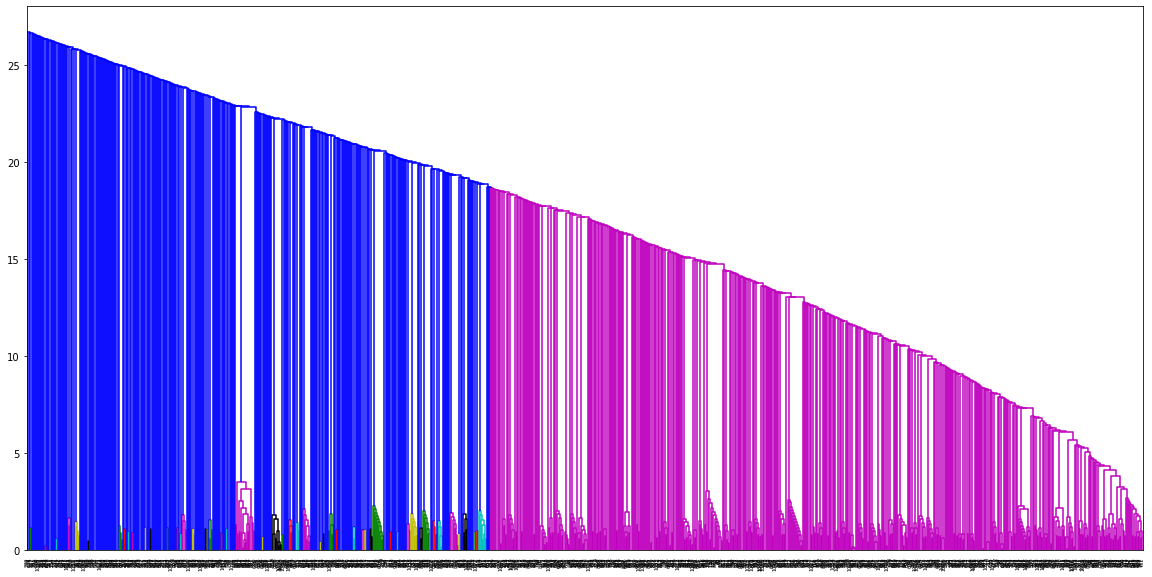

In [70]:
dendrogram_ag(4,"single",vc)

# Average Agg Clustering

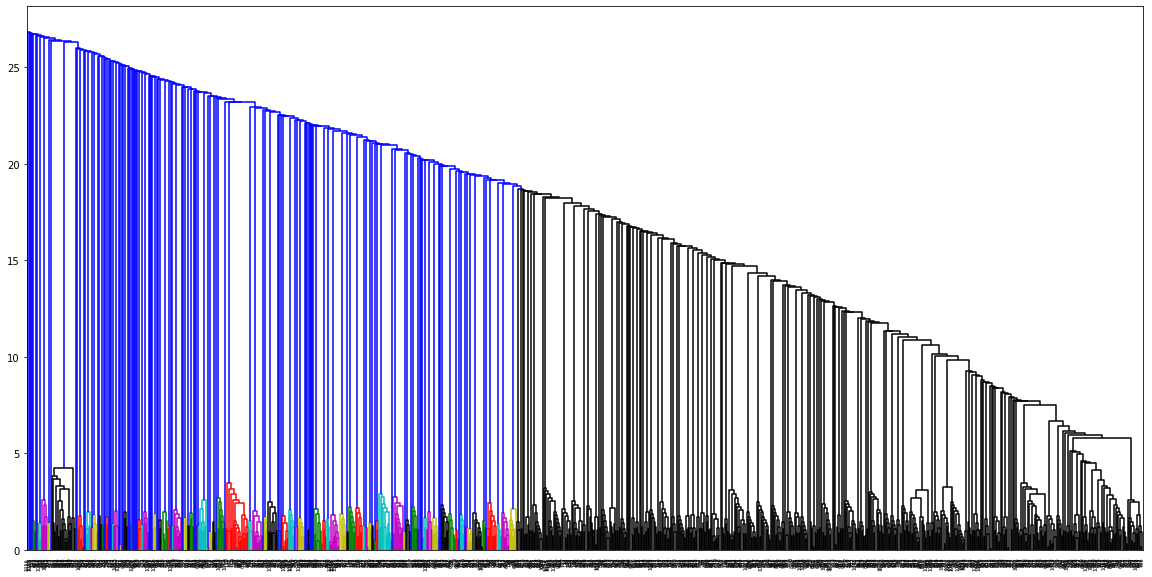

In [63]:
dendrogram_ag(4,"average",vc)

# Complete Agg Clustering 

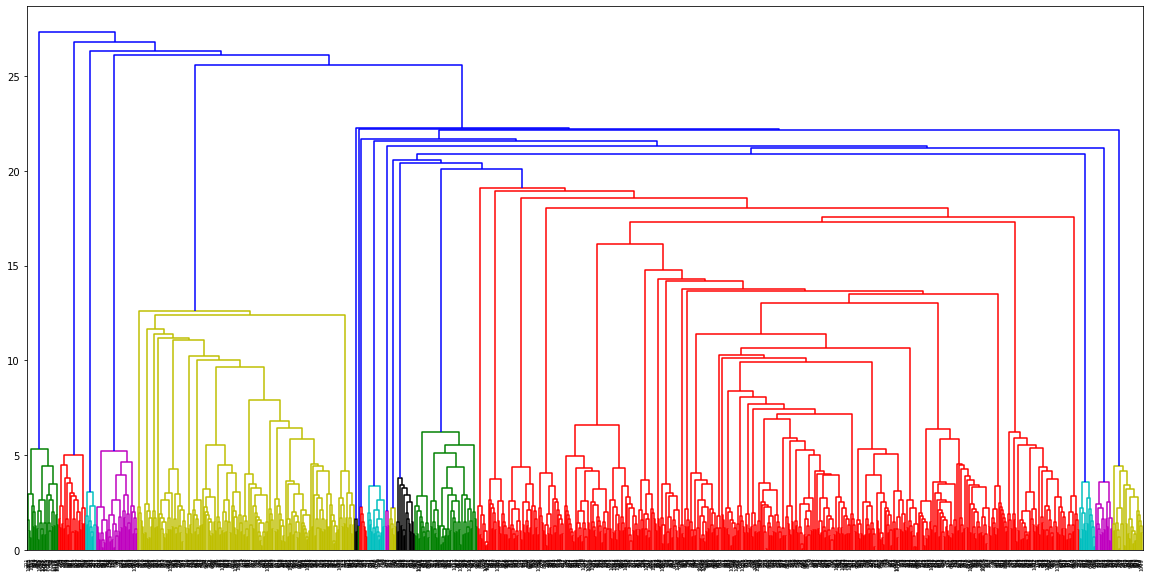

In [71]:
dendrogram_ag(4,"complete",vc)

# Ward Agglomerative clustering

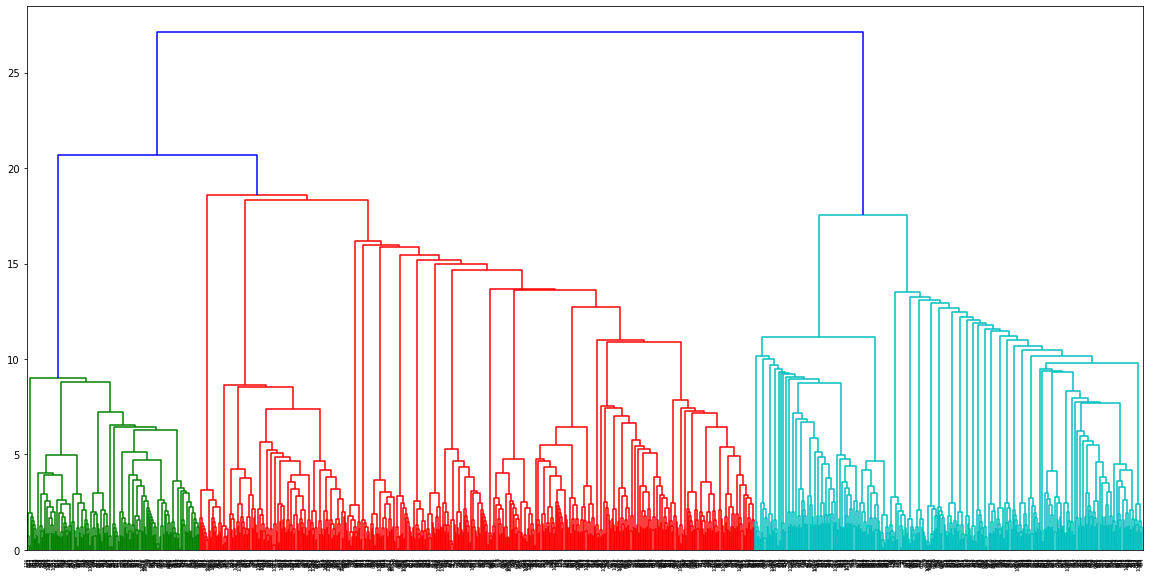

In [72]:
dendrogram_ag(4,"ward",vc)

# Finding the best K


# The “Elbow” Method
Probably the most well known method, the elbow method, in which the cost at each number of clusters is calculated and graphed, and the user looks for a change of slope from steep to shallow (an elbow) to determine the optimal number of clusters. This method is inexact, but still potentially helpful.<br>

# Our aim is to minimize intrasimmilairty and to maximize intersimmilarity (as both of them are  distance based).
So by looking at both the values we will be predicting the value of k . <br>

Module for Calculating Intersimilarity<br>
Intrasimilarity is calculated using intertia_ for k means algo and using get Intra similarity with euclidean system as the cost calculation criteria.


In [73]:
def intersimilarity(centres,labels,vc,similarity_measure='euclidean'):
    dist = 0
    for point_index in range(len(vc)):
        for cluster_index in range(len(centres)):
            if(labels[point_index]!=cluster_index):
                if(similarity_measure=='euclidean'):
                    dist+=np.linalg.norm(vc[point_index]-centres[cluster_index])**2
    return dist

Module for calculating center of clusters 

In [74]:
def get_cluster_centers(labels,vc):
    s = {}
    c = {}
    centers = []
    for point_index in range(len(vc)):
        if(labels[point_index] in s):
            s[labels[point_index]]+=vc[point_index]
            c[labels[point_index]]+=1
        else:
            s[labels[point_index]]=vc[point_index]
            c[labels[point_index]]=1
    for i in np.unique(labels):
        centers.append(s[i]/c[i])
    return np.array(centers)     

Module for calculating intrasimilarity

In [75]:
def intrasimilarity(centres,labels,vc,similarity_measure='euclidean'):
    dist = 0
    for point_index in range(len(vc)):
        for cluster_index in range(len(centres)):
            if(labels[point_index]==cluster_index):
                if(similarity_measure=='euclidean'):
                    dist+=(np.linalg.norm(vc[point_index]-centres[cluster_index]))**2
    return dist

# From here we will start calculating inter and intra simillarity for different clustering algo shown in previous part .
# We will be storing k values , intrasimilarity  and intersimilarity values in these variables.
# Please click on the cell to get better view

 CLUSTERING NAME                          K                            INTER                           INTRA <br>
K MEANS EUCLIDEAN                       k_vals                         inter                          intra<br>
K Means Cosine                          k_vals2                        inter2                         intra2<br>
Agglomerative Single                    k_vals3                        inter3                         intra3<br>
Agglomerative Average                   k_vals4                        inter4                         intra4<br>
Agglomerative Complete                  k_valsComplete                interComplete                  intraComplete<br>
Agglomerative Ward                      k_valsWard                    interWard                      intraWard<br>


# Computation starts here 



# KMeans Clustering :  eucledian 

In [157]:
vc = normalisedVC

In [159]:

k_vals = []
inter = []
intra = []
for k in tqdm(range(2, 40, 2)):
    km=KMeans(k,max_iter=150)
    km.fit(vc)
    k_vals.append(k)
    intra.append(km.inertia_/k)
    inter.append(intersimilarity(km.cluster_centers_,km.labels_,vc)/k)




  0%|                                                                                           | 0/19 [00:00<?, ?it/s]


  5%|████▎                                                                              | 1/19 [00:16<04:51, 16.18s/it]


 11%|████████▋                                                                          | 2/19 [00:36<04:54, 17.33s/it]


 16%|█████████████                                                                      | 3/19 [00:57<04:56, 18.52s/it]


 21%|█████████████████▍                                                                 | 4/19 [01:21<05:03, 20.20s/it]


 26%|█████████████████████▊                                                             | 5/19 [01:49<05:15, 22.51s/it]


 32%|██████████████████████████▏                                                        | 6/19 [02:21<05:27, 25.21s/it]


 37%|██████████████████████████████▌                                                    | 7/19 [02:54<05:30, 27.55s/it]


 42%|████████████████

In [248]:
print("k       inter-similarity       intra-similarity")
for ind,k in enumerate(k_vals):
    print(str(k)+"       "+str(intra[ind])+"       "+str(inter[ind]))

k       inter-similarity       intra-similarity
2       4.217168096786433e+28       8.273266682189163e+31
4       2.40651626884689e+27       9.45183802113745e+31
6       1.6552863445773806e+26       6.768025480204532e+31
8       1.7514199715921483e+25       5.1058517304882865e+31
10       4.210649038328042e+24       4.115956224483229e+31
12       4.481531512049096e+23       3.4370511412922337e+31
14       1.1001830927184926e+23       3.0269545227475625e+31
16       3.2927700868510136e+22       2.653563321520401e+31
18       9.330275190242172e+21       2.363130187656177e+31
20       5.3028817667259715e+20       2.1307674230008405e+31
22       6.323581217086714e+19       1.9406553387518998e+31
24       3.527435348074156e+18       1.78223096684442e+31
26       1.1751119566354293e+17       1.6481803967201807e+31
28       1.0340472692277068e+16       1.5332799117949494e+31
30       1762685173353639.8       1.4336995337931076e+31
32       103382250349609.22       1.3465667244247911e+31
34   

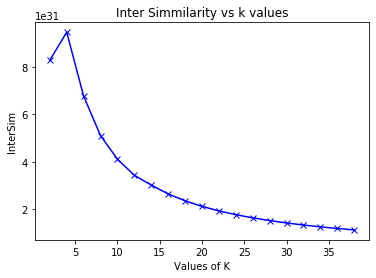

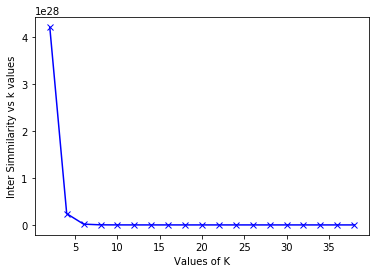

In [249]:
plt.plot(k_vals,inter,'bx-')
#plt.plot(k_valsComplete,intraComplete,c='b',label='Intra-Similarity')
plt.xlabel('Values of K') 
plt.ylabel('InterSim')
plt.title('Inter Simmilarity vs k values') 
plt.show() 
#plt.plot(k_valsComplete,interComplete,'bx-')
plt.plot(k_vals,intra,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inter Simmilarity vs k values') 
plt.show() 

 

#answer for k means clustering using euclidean distance 
Saturation Value for inter = 6 <br>
Max Value for intra = 6 <br>
Ans : So value of K is 6 


# KMeans Clustering : cosine simmilarity

In [164]:
k_vals2 = []
inter2 = []
intra2 = []
for k in tqdm(range(2,40,2)):
    km=KMeans(k,max_iter=150)
    km.fit(normalisedVC)
    k_vals2.append(k)
    intra2.append(km.inertia_/k)
    inter2.append(intersimilarity(km.cluster_centers_,km.labels_,vc)/k)




  0%|                                                                                           | 0/19 [00:00<?, ?it/s]


  5%|████▎                                                                              | 1/19 [00:15<04:45, 15.86s/it]


 11%|████████▋                                                                          | 2/19 [00:35<04:50, 17.09s/it]


 16%|█████████████                                                                      | 3/19 [00:57<04:53, 18.35s/it]


 21%|█████████████████▍                                                                 | 4/19 [01:21<05:02, 20.15s/it]


 26%|█████████████████████▊                                                             | 5/19 [01:49<05:14, 22.47s/it]


 32%|██████████████████████████▏                                                        | 6/19 [02:20<05:25, 25.02s/it]


 37%|██████████████████████████████▌                                                    | 7/19 [02:53<05:30, 27.51s/it]


 42%|████████████████

In [168]:
print("k       inter-similarity       intra-similarity")
for ind,k in enumerate(k_vals2):
    print(str(k)+"       "+str(intra2[ind])+"       "+str(inter2[ind]))

k       inter-similarity       intra-similarity
2       4.217168096786433e+28       8.273266682189163e+31
4       2.40651626884689e+27       9.45183802113745e+31
6       1.6552863445773806e+26       6.768025480204532e+31
8       1.7514199715921483e+25       5.1058517304882865e+31
10       4.210649038328042e+24       4.115956224483229e+31
12       4.481531512049096e+23       3.437051141292234e+31
14       1.1001830927184926e+23       3.026954522747562e+31
16       3.2927700868510136e+22       2.653563321520401e+31
18       9.330275190242172e+21       2.3631301876561765e+31
20       5.3028817667259715e+20       2.1307674230008405e+31
22       6.323581217086714e+19       1.9406553387518998e+31
24       3.527435348074156e+18       1.78223096684442e+31
26       1.1751119566354293e+17       1.6481803967201807e+31
28       1.0340472692277068e+16       1.5332799117949494e+31
30       1762685173353639.8       1.4336995337931076e+31
32       103382250349609.22       1.3465667244247911e+31
34    

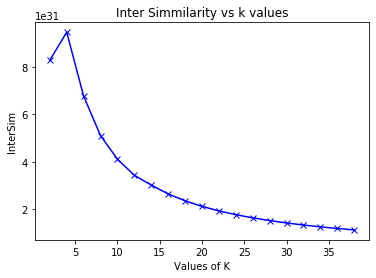

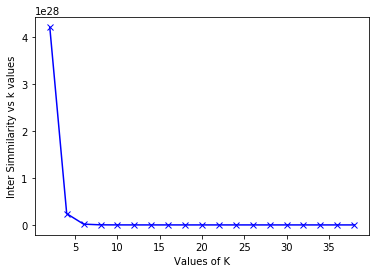

In [224]:
plt.plot(k_vals2,inter2,'bx-')
#plt.plot(k_valsComplete,intraComplete,c='b',label='Intra-Similarity')
plt.xlabel('Values of K') 
plt.ylabel('InterSim')
plt.title('Inter Simmilarity vs k values') 
plt.show() 
#plt.plot(k_valsComplete,interComplete,'bx-')
plt.plot(k_vals2,intra2,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inter Simmilarity vs k values') 
plt.show() 

#answer for k means clustering using cosine simmilarity
Saturation Value for inter = 7 <br>
Max Value for intra = 6 <br>
Ans : So value of K is 6  or 7 


# Agglo Clustering : Single

In [171]:
k_vals3 = []
inter3 = []
intra3 = []

In [172]:
for k in tqdm(range(2,40,2)):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='single')
    cluster.fit_predict(vc)
    k_vals3.append(k)
    intra3.append(intrasimilarity(get_cluster_centers(cluster.labels_,orignalVC),cluster.labels_,orignalVC)/k)
    inter3.append(intersimilarity(get_cluster_centers(cluster.labels_,orignalVC),cluster.labels_,orignalVC)/k)





  0%|                                                                                           | 0/19 [00:00<?, ?it/s]



  5%|████▎                                                                              | 1/19 [00:49<14:58, 49.90s/it]



 11%|████████▋                                                                          | 2/19 [01:39<14:09, 49.96s/it]



 16%|█████████████                                                                      | 3/19 [02:29<13:15, 49.72s/it]



 21%|█████████████████▍                                                                 | 4/19 [03:18<12:24, 49.63s/it]



 26%|█████████████████████▊                                                             | 5/19 [04:08<11:34, 49.60s/it]



 32%|██████████████████████████▏                                                        | 6/19 [04:58<10:48, 49.86s/it]



 37%|██████████████████████████████▌                                                    | 7/19 [05:48<09:57, 49.83s/it]



 42%|███████

In [173]:
print("k       inter-similarity       intra-similarity")
for ind,k in enumerate(k_vals3):
    print(str(k)+"       "+str(intra3[ind])+"       "+str(inter3[ind]))

k       inter-similarity       intra-similarity
2       2.9076019500666746e+30       1.0299974798487777e+33
4       3.1528663129422553e+29       4.96715921008326e+33
6       3.8182939226225e+28       3.9155678012014466e+33
8       1.460455613211688e+28       3.038367995403989e+33
10       2.0826405302187215e+27       2.4659833411079766e+33
12       2.627607774801544e+26       2.062886086156683e+33
14       2.8237416711150975e+25       1.771914916301614e+33
16       2.4980528301954986e+24       1.553334919713293e+33
18       1.1733966538600589e+23       1.383307477392994e+33
20       5.172303610981006e+21       1.247290250823287e+33
22       4.1646952955138094e+20       1.136005327576649e+33
24       1.7137415017012472e+19       1.0432686110297866e+33
26       2.0792165504716403e+18       9.647991955975868e+32
28       1.6994938898205123e+17       8.97539720721142e+32
30       1.1783200224467626e+16       8.392481834392472e+32
32       3208878269378559.0       7.882430900688335e+32
34  

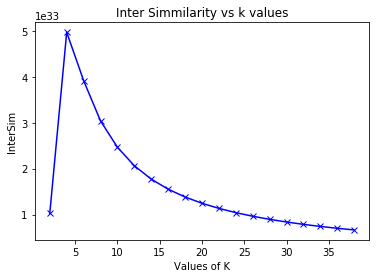

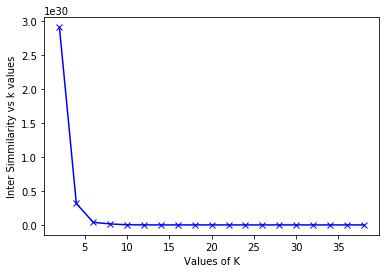

In [222]:
plt.plot(k_vals3,inter3,'bx-')
#plt.plot(k_valsComplete,intraComplete,c='b',label='Intra-Similarity')
plt.xlabel('Values of K') 
plt.ylabel('InterSim')
plt.title('Inter Simmilarity vs k values') 
plt.show() 
#plt.plot(k_valsComplete,interComplete,'bx-')
plt.plot(k_vals3,intra3,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inter Simmilarity vs k values') 
plt.show() 

#answer for Agglo Single Clustering <br>
Saturation Value for inter = 6 <br>
Max Value for intra = 7 <br>
Ans : So value of K is 6 or 7  


# Agglo Clustering : Average

In [177]:
k_vals4= []
inter4 = []
intra4 = []

In [178]:
for k in tqdm(range(2,40,2)):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='average')
    cluster.fit_predict(vc)
    k_vals4.append(k)
    intra4.append(intrasimilarity(get_cluster_centers(cluster.labels_,orignalVC),cluster.labels_,orignalVC)/k)
    inter4.append(intersimilarity(get_cluster_centers(cluster.labels_,orignalVC),cluster.labels_,orignalVC)/k)





  0%|                                                                                           | 0/19 [00:00<?, ?it/s]



  5%|████▎                                                                              | 1/19 [00:49<14:42, 49.03s/it]



 11%|████████▋                                                                          | 2/19 [01:38<13:54, 49.09s/it]



 16%|█████████████                                                                      | 3/19 [02:27<13:07, 49.19s/it]



 21%|█████████████████▍                                                                 | 4/19 [03:17<12:20, 49.38s/it]



 26%|█████████████████████▊                                                             | 5/19 [04:07<11:33, 49.56s/it]



 32%|██████████████████████████▏                                                        | 6/19 [04:57<10:47, 49.79s/it]



 37%|██████████████████████████████▌                                                    | 7/19 [05:47<09:58, 49.90s/it]



 42%|███████

In [179]:
print("k       inter-similarity       intra-similarity")
for ind,k in enumerate(k_vals4):
    print(str(k)+"       "+str(intra4[ind])+"       "+str(inter4[ind]))

k       inter-similarity       intra-similarity
2       2.2229362239948056e+31       8.673916816829239e+33
4       2.6454583088869815e+30       3.858211681908151e+34
6       3.1591004336064993e+29       3.1217236721485274e+34
8       1.010262535895655e+29       2.4831059622858905e+34
10       3.4123394264406224e+29       2.0396583070914652e+34
12       2.5128627455712653e+30       2.0214232149501139e+34
14       2.2254443818588387e+26       3.5146592537149255e+34
16       6.669657351765842e+24       3.0810461324864953e+34
18       4.2276849207435943e+24       2.743792878192142e+34
20       3.479171688754275e+22       2.4739999379206045e+34
22       2.3737831014394484e+21       2.2532671326454185e+34
24       8.682671954319587e+20       2.0693235343206544e+34
26       1.5195962200838875e+19       1.9136790994672187e+34
28       6.225411545902287e+17       1.7802697069926822e+34
30       2.381422312524154e+17       1.6646482418220078e+34
32       3.923828960967994e+16       1.56347946252

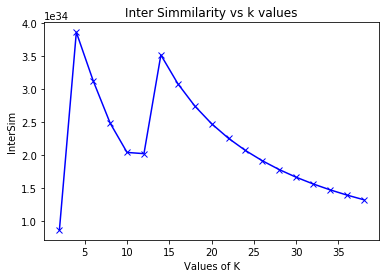

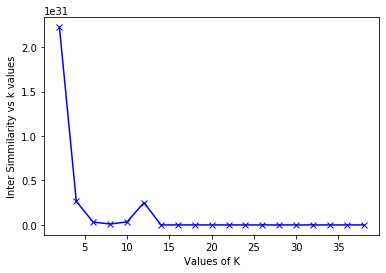

In [250]:
plt.plot(k_vals4,inter4,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('InterSim')
plt.title('Inter Simmilarity vs k values') 
plt.show() 

plt.plot(k_vals4,intra4,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inter Simmilarity vs k values') 
plt.show() 

#answer for Agglo Average Clustering <br>
Saturation Value for inter = 6 <br>
Max Value for intra = 6 <br>
Ans : So value of K is 6   


# Agglo Clustering : Complete

In [183]:
k_valsComplete = []
interComplete = []
intraComplete = []

In [184]:
for k in tqdm(range(2,40,2)):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='complete')
    cluster.fit_predict(vc)
    k_valsComplete.append(k)
    intraComplete.append(intrasimilarity(get_cluster_centers(cluster.labels_,orignalVC),cluster.labels_,orignalVC)/k)
    interComplete.append(intersimilarity(get_cluster_centers(cluster.labels_,orignalVC),cluster.labels_,orignalVC)/k)





  0%|                                                                                           | 0/19 [00:00<?, ?it/s]



  5%|████▎                                                                              | 1/19 [00:49<14:53, 49.63s/it]



 11%|████████▋                                                                          | 2/19 [01:39<14:07, 49.83s/it]



 16%|█████████████                                                                      | 3/19 [02:32<13:32, 50.80s/it]



 21%|█████████████████▍                                                                 | 4/19 [03:26<12:53, 51.53s/it]



 26%|█████████████████████▊                                                             | 5/19 [04:19<12:09, 52.10s/it]



 32%|██████████████████████████▏                                                        | 6/19 [05:12<11:20, 52.34s/it]



 37%|██████████████████████████████▌                                                    | 7/19 [06:04<10:26, 52.24s/it]



 42%|███████

In [185]:
print("k       inter-similarity       intra-similarity")
for ind,k in enumerate(k_valsComplete):
    print(str(k)+"       "+str(intraComplete[ind])+"       "+str(interComplete[ind]))

k       inter-similarity       intra-similarity
2       2.858048306111686e+32       2.6016168525562776e+35
4       5.330484300192866e+31       8.663254741494421e+35
6       5.537265194427011e+30       6.702925348536664e+35
8       4.511173078525367e+29       5.1480078503907304e+35
10       9.928956495097788e+29       4.142288152621008e+35
12       8.32757685847161e+28       3.52496542906792e+35
14       1.1021112105812112e+28       3.0318204855971217e+35
16       1.1602886145573587e+26       2.6584208326955457e+35
18       3.1485781759175283e+24       2.367441970990623e+35
20       2.7004492815427594e+23       2.1346656463518496e+35
22       2.3846480197384562e+22       1.9442138289050537e+35
24       8.729500304021704e+20       1.7855045665809657e+35
26       8.787028754264696e+19       1.6512122204943476e+35
28       1.5758098134750198e+19       1.5361045183864729e+35
30       2.6363806183519355e+18       1.4363445191476746e+35
32       5.94774343656328e+18       1.3490545207761628e+

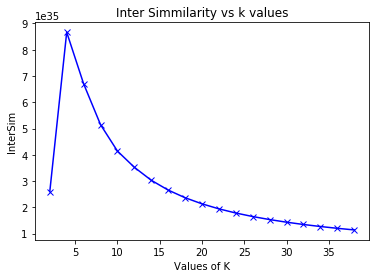

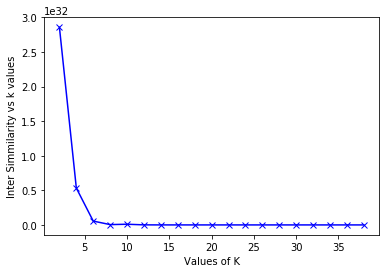

In [220]:
plt.plot(k_valsComplete,interComplete,'bx-')
#plt.plot(k_valsComplete,intraComplete,c='b',label='Intra-Similarity')
plt.xlabel('Values of K') 
plt.ylabel('InterSim')
plt.title('Inter Simmilarity vs k values') 
plt.show() 
#plt.plot(k_valsComplete,interComplete,'bx-')
plt.plot(k_valsComplete,intraComplete,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inter Simmilarity vs k values') 
plt.show() 

#answer for Agglo Complete Clustering <br>
Saturation Value for inter = 6 <br>
Max Value for intra = 6 <br>
Ans : So value of K is 6   


# Agglo Clustering :  Ward

In [194]:
k_valsWard1 = []
interWard1 = []
intraWard1 = []

In [195]:
k_valsWard1 = []
interWard1 = []
intraWard1 = []
for k in tqdm(range(2,40,2)):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
    cluster.fit_predict(vc)
    k_valsWard1.append(k)
    intraWard1.append(intrasimilarity(get_cluster_centers(cluster.labels_,orignalVC),cluster.labels_,orignalVC)/k)
    interWard1.append(intersimilarity(get_cluster_centers(cluster.labels_,orignalVC),cluster.labels_,orignalVC)/k
                    )





  0%|                                                                                           | 0/19 [00:00<?, ?it/s]



  5%|████▎                                                                              | 1/19 [00:49<14:54, 49.68s/it]



 11%|████████▋                                                                          | 2/19 [02:03<16:07, 56.94s/it]



 16%|█████████████                                                                      | 3/19 [04:02<20:08, 75.52s/it]



 21%|█████████████████▍                                                                 | 4/19 [05:58<21:57, 87.82s/it]



 26%|█████████████████████▊                                                             | 5/19 [07:58<22:44, 97.44s/it]



 32%|█████████████████████████▉                                                        | 6/19 [09:52<22:09, 102.26s/it]



 37%|██████████████████████████████▏                                                   | 7/19 [11:47<21:12, 106.05s/it]



 42%|███████

In [196]:
print("k       inter-similarity       intra-similarity")
for ind,k in enumerate(k_valsWard1):
    print(str(k)+"       "+str(interWard1[ind])+"       "+str(interWard1[ind]))

k       inter-similarity       intra-similarity
2       3.543544329425209e+37       3.543544329425209e+37
4       2.218256297574731e+38       2.218256297574731e+38
6       2.290494629756624e+38       2.290494629756624e+38
8       1.8899955476384244e+38       1.8899955476384244e+38
10       1.5439643703669221e+38       1.5439643703669221e+38
12       1.2892956063210012e+38       1.2892956063210012e+38
14       1.1071721624872415e+38       1.1071721624872415e+38
16       9.705887637827104e+37       9.705887637827104e+37
18       8.64352757391544e+37       8.64352757391544e+37
20       7.79366214001365e+37       7.79366214001365e+37
22       7.098329746949808e+37       7.098329746949808e+37
24       6.518886809721051e+37       6.518886809721051e+37
26       6.028589187187302e+37       6.028589187187302e+37
28       5.608334114829195e+37       5.608334114829195e+37
30       5.244113060353202e+37       5.244113060353202e+37
32       4.925419692449167e+37       4.925419692449167e+37
34      

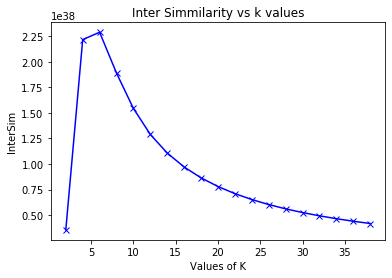

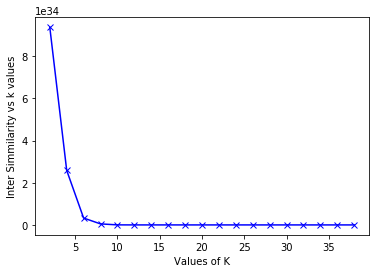

In [225]:
plt.plot(k_valsWard1,interWard1,'bx-')
#plt.plot(k_valsComplete,intraComplete,c='b',label='Intra-Similarity')
plt.xlabel('Values of K') 
plt.ylabel('InterSim')
plt.title('Inter Simmilarity vs k values') 
plt.show()

#plt.plot(k_valsComplete,interComplete,'bx-')
plt.plot(k_valsWard1,intraWard1,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inter Simmilarity vs k values') 
plt.show() 

#answer for Agglo Ward Clustering <br>
Saturation Value for inter = 8 <br>
Max Value for intra = 8 <br>
Ans : So value of K is 8   


# Comparing Clustering vs TF-IDF model

We want to predict all the documents in the cluster same as the query as retrieved documents<br>
We have already added the queries as the last 10 elements of the corpora.
We will show one result based on K means clustering and one on Agglo Clustering .


In [230]:
km=KMeans(8,max_iter=100)
km.fit(vc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [231]:
clusters = km.labels_.tolist()
print(clusters) 


[2, 5, 1, 4, 3, 7, 3, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [232]:
result = [None]*10
clusterID = [None]*10
for i in range(-10,0):
    clusterNo = km.labels_[i]
    clusterID[i] = clusterNo
    result[i] = (set([(i+1) for (i,j) in enumerate(km.labels_) if j == clusterNo])) #Result[i] will have all the docs in the same cluster as query

print(result)

[{10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227

In [233]:
print(len(result))

10


In [234]:
print(clusterID)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [235]:
type(result[0])

set

TF-IDF RESULT

In [236]:
import heapq #used as data structure 
matchList = [None]*10
for i in range(10):
    count = len(result[i])
    print("Results - (Precision, Recall) for Level ", count, ": ")
    matchList[i] = set([x+1 for x in heapq.nlargest(count, range(len(cos_sim[i])), cos_sim[i].__getitem__)])
    #print(matchList[i])
    matchCount = len(matchList[i] & query_index[i])
    ans = (matchCount/count, matchCount/len(query_index[i]))
    print("Query ", i+1, ": ", ans)

Results - (Precision, Recall) for Level  1057 : 
Query  1 :  (0.005676442762535478, 1.0)
Results - (Precision, Recall) for Level  1057 : 
Query  2 :  (0.003784295175023652, 1.0)
Results - (Precision, Recall) for Level  1057 : 
Query  3 :  (0.011352885525070956, 1.0)
Results - (Precision, Recall) for Level  1057 : 
Query  4 :  (0.004730368968779565, 1.0)
Results - (Precision, Recall) for Level  1057 : 
Query  5 :  (0.003784295175023652, 1.0)
Results - (Precision, Recall) for Level  1057 : 
Query  6 :  (0.008514664143803218, 1.0)
Results - (Precision, Recall) for Level  1057 : 
Query  7 :  (0.015137180700094607, 1.0)
Results - (Precision, Recall) for Level  1057 : 
Query  8 :  (0.002838221381267739, 1.0)
Results - (Precision, Recall) for Level  1057 : 
Query  9 :  (0.005676442762535478, 1.0)
Results - (Precision, Recall) for Level  1057 : 
Query  10 :  (0.006622516556291391, 1.0)


### Cluster result for k means clustering

In [237]:
for i in range(10):
    matchCount = len(result[i] & query_index[i])
    ans = (matchCount/len(result[i]), matchCount/len(query_index[i]))
    print("Query ", i+1, ": ", ans)

Query  1 :  (0.005676442762535478, 1.0)
Query  2 :  (0.003784295175023652, 1.0)
Query  3 :  (0.011352885525070956, 1.0)
Query  4 :  (0.004730368968779565, 1.0)
Query  5 :  (0.003784295175023652, 1.0)
Query  6 :  (0.008514664143803218, 1.0)
Query  7 :  (0.014191106906338695, 0.9375)
Query  8 :  (0.002838221381267739, 1.0)
Query  9 :  (0.005676442762535478, 1.0)
Query  10 :  (0.006622516556291391, 1.0)


### Same using Agglomerative Clustering 

In [238]:
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean',linkage='ward')
cluster.fit_predict(orignalVC)

array([6, 7, 5, ..., 4, 4, 4], dtype=int64)

In [239]:
for i in range(10):
    matchCount = len(result[i] & query_index[i])
    ans = (matchCount/len(result[i]), matchCount/len(query_index[i]))
    print("Query ", i+1, ": ", ans)

Query  1 :  (0.005676442762535478, 1.0)
Query  2 :  (0.003784295175023652, 1.0)
Query  3 :  (0.011352885525070956, 1.0)
Query  4 :  (0.004730368968779565, 1.0)
Query  5 :  (0.003784295175023652, 1.0)
Query  6 :  (0.008514664143803218, 1.0)
Query  7 :  (0.014191106906338695, 0.9375)
Query  8 :  (0.002838221381267739, 1.0)
Query  9 :  (0.005676442762535478, 1.0)
Query  10 :  (0.006622516556291391, 1.0)


In [240]:
for i in range(-10,0):
    clusterNo = cluster.labels_[i]
    result[i] = (set([(i+1) for (i,j) in enumerate(cluster.labels_) if j == clusterNo]))

Finally we have produced output for both the cases. After comparing result in both the cases one can say that they are not supporting the theory. But still the results are good . Precision and recall were good in the case of clustering as well.

# Comparisions
# TF-IDF Result vs Kmeans vs Agglo Clustering 

TF-IDF <BR>
Results - (Precision, Recall) for Level  1057 :<BR>
Query  1 :  (0.005676442762535478, 1.0)<BR>
Results - (Precision, Recall) for Level  1057 :<BR> 
Query  2 :  (0.003784295175023652, 1.0)<BR>
Results - (Precision, Recall) for Level  1057 :<BR> 
Query  3 :  (0.011352885525070956, 1.0)<BR>
Results - (Precision, Recall) for Level  1057 :<BR> 
Query  4 :  (0.004730368968779565, 1.0)<BR>
Results - (Precision, Recall) for Level  1057 :<BR> 
Query  5 :  (0.003784295175023652, 1.0)<BR>
Results - (Precision, Recall) for Level  1057 :<BR> 
Query  6 :  (0.008514664143803218, 1.0)<BR>
Results - (Precision, Recall) for Level  1057 :<BR> 
Query  7 :  (0.015137180700094607, 1.0)<BR>
Results - (Precision, Recall) for Level  1057 :<BR> 
Query  8 :  (0.002838221381267739, 1.0)<BR>
Results - (Precision, Recall) for Level  1057 :<BR> 
Query  9 :  (0.005676442762535478, 1.0)<BR>
Results - (Precision, Recall) for Level  1057 :<BR> 
Query  10 :  (0.006622516556291391, 1.0)<BR>
KMeans<br>
Query  1 :  (0.005676442762535478, 1.0)<br>
Query  2 :  (0.003784295175023652, 1.0)<br>
Query  3 :  (0.011352885525070956, 1.0)<br>
Query  4 :  (0.004730368968779565, 1.0)<br>
Query  5 :  (0.003784295175023652, 1.0)<br>
Query  6 :  (0.008514664143803218, 1.0)<br>
Query  7 :  (0.014191106906338695, 0.9375)<br>
Query  8 :  (0.002838221381267739, 1.0)<br>
Query  9 :  (0.005676442762535478, 1.0)<br>
Query  10 :  (0.006622516556291391, 1.0)<br>
Agglo Clustering<br>
Query  1 :  (0.005676442762535478, 1.0)<br>
Query  2 :  (0.003784295175023652, 1.0)<br>
Query  3 :  (0.011352885525070956, 1.0)<br>
Query  4 :  (0.004730368968779565, 1.0)<br>
Query  5 :  (0.003784295175023652, 1.0)<br>
Query  6 :  (0.008514664143803218, 1.0)<br>
Query  7 :  (0.014191106906338695, 0.9375)<br>
Query  8 :  (0.002838221381267739, 1.0)<br>
Query  9 :  (0.005676442762535478, 1.0)<br>
Query  10 :  (0.006622516556291391, 1.0)<br>

So we retrieved all the docs as in the same cluster as query. Which due to not so perfect clustering was majorly concentrated in 1 cluster only.<br>
So we can show that recall increased to 1 for the queries when clustering is involved.<br>
For precision we can't predict as depending to clustering the precision can go in both ways.<br>




# End
    


